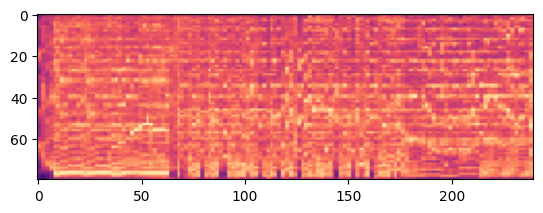

(80, 240, 4)

In [29]:
import matplotlib.pyplot as plt
from matplotlib.image import imread,imsave
from tensorflow.keras.preprocessing.image import img_to_array
img = imread("../music/ARASHI/image_data/ARASHI - ｢未完｣ [Official Music Video]_01.png")
plt.imshow(img,)
plt.show()
array = img_to_array(img)
array.shape

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import utils
utils.set_random_seed(0)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255,validation_split=0.25)
# 
train_generator = datagen.flow_from_directory(
        'train',
        subset='training',
        target_size=(80, 240),
        batch_size=16,
        class_mode='categorical'
        )

val_generator = datagen.flow_from_directory(
        'train',
        subset='validation',
        target_size=(80, 240),
        batch_size=16,
        class_mode='categorical'
        )

test_generator = datagen.flow_from_directory(
        'test',
        target_size=(80, 240),
        batch_size=16,
        class_mode='categorical'
        )

2025-02-03 20:51:34.579743: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-03 20:51:34.579809: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-03 20:51:34.641809: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-03 20:51:34.772385: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-03 20:51:35.703020: W tensorflow/compiler/tf2

Found 1135 images belonging to 8 classes.
Found 376 images belonging to 8 classes.
Found 509 images belonging to 8 classes.


In [3]:
train_generator.class_indices

{'ARASHI': 0,
 'MRCHILDREN': 1,
 'NAGABUCHI': 2,
 'SOUTHEN': 3,
 'SPITZ': 4,
 'TANIMURA': 5,
 'YONE': 6,
 'YUZU': 7}

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
# モデル定義
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(80, 240, 3)))
model.add(MaxPooling2D(pool_size=(5, 3)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 3)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 76, 236, 32)       2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 78, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 74, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 24, 32)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dropout (Dropout)           (None, 1536)              0

2025-02-03 20:51:45.960572: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-03 20:51:46.226682: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-03 20:51:46.226974: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [6]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50
)

Epoch 1/50


2025-02-03 20:51:56.359999: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2025-02-03 20:51:56.675545: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-02-03 20:51:57.317614: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-02-03 20:51:57.764903: I external/local_xla/xla/service/service.cc:168] XLA service 0x7e4304bf3ad0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-02-03 20:51:57.764934: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 SUPER, Compute Capability 7.5
2025-02-03 20:51:57.782010: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738583517.883438    8091 device_com

71/71 [==============================] - 5s 28ms/step - loss: 1.9169 - accuracy: 0.2837 - val_loss: 1.8501 - val_accuracy: 0.3644
Epoch 2/50
71/71 [==============================] - 1s 15ms/step - loss: 1.7757 - accuracy: 0.3692 - val_loss: 1.6843 - val_accuracy: 0.4149
Epoch 3/50
71/71 [==============================] - 1s 16ms/step - loss: 1.7008 - accuracy: 0.4115 - val_loss: 1.7404 - val_accuracy: 0.4043
Epoch 4/50
71/71 [==============================] - 1s 15ms/step - loss: 1.6756 - accuracy: 0.4150 - val_loss: 1.6746 - val_accuracy: 0.4282
Epoch 5/50
71/71 [==============================] - 1s 15ms/step - loss: 1.6190 - accuracy: 0.4264 - val_loss: 1.6429 - val_accuracy: 0.4362
Epoch 6/50
71/71 [==============================] - 1s 15ms/step - loss: 1.6144 - accuracy: 0.4194 - val_loss: 1.6081 - val_accuracy: 0.4309
Epoch 7/50
71/71 [==============================] - 1s 15ms/step - loss: 1.5661 - accuracy: 0.4370 - val_loss: 1.6188 - val_accuracy: 0.4043
Epoch 8/50
71/71 [======

In [7]:
import pandas as pd
result = pd.DataFrame(history.history)

<Axes: >

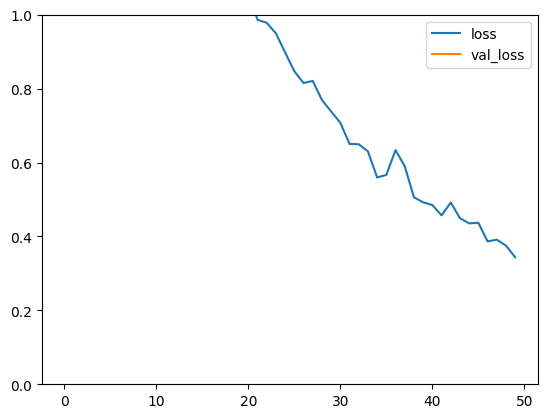

In [8]:
result[['loss','val_loss']].plot(ylim=[0, 1])

<Axes: >

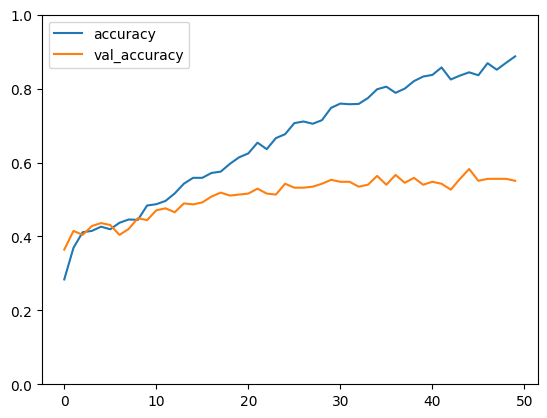

In [9]:
result[['accuracy', 'val_accuracy']].plot(ylim=[0, 1])

In [10]:
model.evaluate(test_generator)

32/32 [==============================] - 1s 20ms/step - loss: 2.4389 - accuracy: 0.4971


[2.438929796218872, 0.4970530569553375]

ここから先は、付随して試行したこと。
generator を使ったものの、実データを見たかった。

In [78]:
y_pred = model.predict(test_generator)

32/32 [==============================] - 0s 15ms/step


In [79]:
y_pred.shape

(509, 8)

In [80]:
y_pred_i = np.argmax(y_pred,axis=1)

In [81]:
y_pred_i

array([5, 5, 2, 0, 1, 4, 5, 4, 5, 4, 4, 5, 1, 7, 0, 0, 7, 5, 2, 7, 5, 4,
       1, 5, 1, 4, 5, 1, 4, 1, 0, 7, 4, 5, 0, 5, 0, 4, 4, 1, 2, 0, 5, 1,
       2, 0, 2, 4, 0, 5, 0, 1, 0, 7, 4, 6, 0, 2, 5, 1, 7, 5, 5, 2, 4, 1,
       1, 1, 3, 0, 0, 5, 0, 1, 5, 5, 1, 2, 2, 2, 1, 5, 0, 7, 1, 0, 0, 0,
       5, 3, 7, 1, 0, 1, 2, 7, 5, 1, 1, 6, 1, 0, 1, 1, 7, 5, 1, 3, 5, 1,
       5, 0, 7, 0, 1, 6, 5, 5, 4, 5, 5, 7, 5, 6, 1, 5, 0, 0, 4, 5, 0, 0,
       5, 1, 0, 2, 1, 7, 7, 7, 3, 1, 3, 0, 5, 5, 0, 7, 7, 1, 5, 1, 3, 7,
       1, 7, 0, 0, 5, 1, 0, 3, 0, 5, 5, 2, 4, 3, 1, 5, 1, 5, 5, 7, 5, 0,
       1, 4, 2, 5, 5, 7, 5, 1, 1, 0, 5, 5, 5, 5, 5, 0, 1, 1, 6, 1, 5, 0,
       6, 5, 1, 1, 1, 1, 5, 0, 5, 0, 5, 5, 2, 5, 1, 2, 6, 1, 7, 7, 0, 5,
       5, 2, 1, 7, 2, 1, 5, 0, 3, 2, 5, 0, 6, 5, 3, 0, 0, 5, 7, 0, 7, 4,
       0, 7, 3, 6, 0, 1, 0, 2, 5, 0, 5, 0, 1, 5, 0, 7, 0, 4, 5, 0, 5, 5,
       4, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 1, 0, 7, 3, 7, 5, 5, 6, 5, 7,
       4, 1, 0, 4, 0, 0, 5, 0, 2, 1, 4, 5, 0, 0, 0,

↓　test_generatorで作成されたデータのラベルを確認

In [84]:
y_test_label = test_generator.classes

In [85]:
y_test_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [86]:
print(y_pred_i.shape)
print(y_test_label.shape)

(509,)
(509,)


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test_label,y_pred_i))

              precision    recall  f1-score   support

           0       0.15      0.19      0.17        81
           1       0.19      0.24      0.21        71
           2       0.05      0.04      0.04        47
           3       0.00      0.00      0.00        27
           4       0.10      0.07      0.08        41
           5       0.32      0.35      0.33       149
           6       0.05      0.02      0.03        41
           7       0.08      0.08      0.08        52

    accuracy                           0.18       509
   macro avg       0.12      0.12      0.12       509
weighted avg       0.17      0.18      0.18       509

